In [1]:
!pip install pymysql

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.8/44.8 kB 879.4 kB/s eta 0:00:00


In [2]:
import pymysql
import pandas as pd
import numpy as np
from google.colab import data_table

In [3]:
data_table.enable_dataframe_formatter()

In [4]:
#Connect to MySQL database

cnx = pymysql.connect(user='buspark', password='U@5p1r3!',
                              host='masscourtsplus.org',
                              database='wp_courtdocs') #REMEMBER LOGIN


cursor = cnx.cursor()
# more info here: https://docs.google.com/document/d/1aZKF0X7HjcXUYurD8uQYDpgo9wQdeJH4CMviBJeTYVc/edit#

In [5]:
# query for count of judges


query =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%capias%'
ORDER BY case_id ASC
"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [6]:
capias_cases= pd.DataFrame (results)
capias_cases

,0,1,2,3,4,5,6,7
0,6200,5464,Court,Capias,"Capias issued for D01 THOMAS IRBY, JR.; arrest...",2011-12-16 00:00:00,0,2023-03-28 22:55:55
1,6201,5464,Court,Case inactivated,Case Inactivated: Capias outstanding.,2011-12-16 00:00:00,0,2023-03-28 22:55:55
2,6202,5464,Court,No capias returned,No Capias returned,2012-03-05 00:00:00,0,2023-03-28 22:55:55
3,6205,5464,Court,Capias expired,Capias returned expired and unserved. Defenda...,2012-08-28 00:00:00,0,2023-03-28 22:55:55
4,6243,5481,Court,Capias,Capias issued for D01 LEVI WARE; arrest after ...,2011-08-04 00:00:00,0,2023-03-28 22:55:55
...,...,...,...,...,...,...,...,...
2243798,105670731,105462927,,,Notice of Authorization To Issue Capias For Ar...,2024-01-17 00:00:00,0,2024-01-19 20:28:23
2243799,105856571,105856564,,Capias,"01/11/2019: Default Judgment entered $1,886.60...",2024-02-09 00:00:00,0,2024-02-16 20:17:59
2243800,105867903,105867895,,,Original Capias mailed to Atty.,2024-02-15 00:00:00,0,2024-02-19 21:13:54
2243801,105990147,105990141,,Default,04/30/2008: Default Judgment entered $837.90\n...,2024-03-04 00:00:00,0,2024-03-11 20:37:10


In [7]:
columns = capias_cases.columns
columns

uni_actions = capias_cases[3].unique()
uni_actions

array(['Capias', 'Case inactivated', 'No capias returned',
       'Capias expired', 'Debtor before the court',
       'Motion for new capias', 'Motion allowed', 'Event cancelled',
       'Event scheduled', 'Hearing', 'Misc Notes', 'Capias returned',
       'Satisfaction of judgment', 'Agreement for Judgment',
       'Capias returned unserved', '', 'Default', 'Continuance',
       'Return of Service', 'Military affidavit filed', 'Event resulted',
       'Execution unsatisfied', 'Motion to transfer', 'Payment order',
       'Notice of dismissal filed', 'Judgment', 'Appearance filed',
       'Dismissal', 'Execution satisfied',
       'Suggestion of bankruptcy filed', 'Motion denied',
       'Motion to remove default', 'Complaint filed', 'Judgment vacated',
       'Affidavit filed', 'Motion withdrawn',
       'Motion to attach by trustee pr', 'Motion to vacate judgment',
       'Payment Review', 'Motion to Substitute a Party', 'Notice sent',
       'Request for continuance', 'Motion for co

In [8]:
fil_data = capias_cases[capias_cases[3]== 'Capias']
uni_cases = fil_data[1].nunique()
uni_cases
print("Number of Capias cases: ", uni_cases)

Number of Capias cases:  720920


In [9]:
# query for count of judges


query1 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%default%'
AND action = 'Default'

"""

%time

cursor.execute(query1) # executing query

results1 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 7.39 µs


In [10]:
def_list= pd.DataFrame (results1)
ndef_list=len(def_list)
print("Number of Default cases: ", ndef_list)

Number of Default cases:  635071


In [11]:
# query for count of judges


query2 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%capias%'
AND action = 'Capias'

"""

%time

cursor.execute(query2) # executing query

results2 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 9.3 µs


In [12]:
capias_list= pd.DataFrame (results2)
ncapias_list=len(capias_list)
capias_list

,0
0,5464
1,5481
2,5487
3,5505
4,5515
...,...
720915,104134535
720916,104155337
720917,104990127
720918,105406705


In [13]:
cap_set=set(capias_list[0].tolist())
def_set = set(def_list[0].tolist())
common_cases = cap_set.intersection(def_set)
num_common_cases = len(common_cases)
common_cases
print("Number of common cases between default and capias: ", num_common_cases)

Number of common cases between default and capias:  237353


In [14]:
# query for count of judges


query3 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%bankruptcy%'

"""

%time

cursor.execute(query3) # executing query

results3 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.11 µs


In [15]:
bankr_list= pd.DataFrame (results3)
nbankr_list=len(bankr_list)
bankr_list

fil_data = capias_cases[capias_cases[3]== 'Capias']
uni_cases = fil_data[1].nunique()
uni_cases
print("Number of common cases between banbkruptcy cases: ", nbankr_list)

Number of common cases between banbkruptcy cases:  89809


In [16]:
bankr_set=set(bankr_list[0].tolist())
bankr_capias_cases = cap_set.intersection(bankr_set)
bankr_def_cases = def_set.intersection(bankr_set)
num_com_cases1 = len(bankr_capias_cases)
num_com_cases2 = len(bankr_def_cases)
print("Number of common cases between bankruptcy and capias: ", num_com_cases1)
print("Number of common cases between bankruptcy and def: ", num_com_cases2)

Number of common cases between bankruptcy and capias:  19032
Number of common cases between bankruptcy and def:  15966


In [24]:
# query for count of judges


query5 =  """
SELECT DISTINCT case_id
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%wage%'

"""

%time

cursor.execute(query5) # executing query

results5 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.34 µs


In [25]:
wage_list= pd.DataFrame (results5)
nwage_list=len(wage_list)
wage_list

wage_set=set(wage_list[0].tolist())
wage_capias_cases = cap_set.intersection(wage_set)
wage_def_cases = def_set.intersection(wage_set)
num_com_cases3 = len(wage_capias_cases)
num_com_cases4 = len(wage_def_cases)

print("Number of common cases between wage garnish cases: ", nwage_list)
print("Number of common cases between wage and capias: ", num_com_cases3)
print("Number of common cases between wage and def: ", num_com_cases4)

Number of common cases between wage garnish cases:  49729
Number of common cases between wage and capias:  492
Number of common cases between wage and def:  7140


In [26]:
capias_wage_cases = wage_set.intersection(cap_set)
bankr_wage_cases = bankr_set.intersection(wage_set)
num_com_cases5 = len(capias_wage_cases)
num_com_cases6 = len(bankr_wage_cases)
print("Number of common cases between wage garnish cases: ", nwage_list)
print("Number of common cases between wage and capias: ", num_com_cases5)
print("Number of common cases between wage and bankruptch: ", num_com_cases6)

Number of common cases between wage garnish cases:  49729
Number of common cases between wage and capias:  492
Number of common cases between wage and bankruptch:  1946


In [20]:
# query for count of judges


query4 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE action LIKE 'Judgment'
AND description REGEXP '\\$[0-9]+'
ORDER BY case_id ASC

"""

%time

cursor.execute(query4) # executing query

results4 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 23.8 µs


In [21]:
jud_case= pd.DataFrame (results4)
jud_case

""


In [22]:
njud_case= len(jud_case)

In [ ]:
# query for count of judges


query1 =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE `case_id`= 5574

"""

%time

cursor.execute(query1) # executing query

results1 = cursor.fetchall() # fetching result

CPU times: user 4 µs, sys: 0 ns, total: 4 µs
Wall time: 8.58 µs


In [ ]:
sin_case= pd.DataFrame (results1)
sin_case

,0,1,2,3,4,5,6,7
0,6440,5574,Plaintiff,Statement of small claim filed,Statement of Small Claim entered on 04/25/2011...,2011-04-25 00:00:00,0,2023-03-28 22:55:55
1,6441,5574,Plaintiff,Appearance filed,Appearance for Nstar Electric Company filed by...,2011-04-25 00:00:00,0,2023-03-28 22:55:55
2,6442,5574,Plaintiff,Fee paid,Filing fee of $40.00 and surcharge of $10.00 p...,2011-04-25 00:00:00,0,2023-03-28 22:55:55
3,6443,5574,Court,Event scheduled,MAGISTRATE TRIAL SCHEDULED for 06/23/2011 11:0...,2011-04-25 00:00:00,0,2023-03-28 22:55:55
4,6444,5574,Court,Notice of trial,Small claim notice of trial issued to plaintif...,2011-04-25 00:00:00,0,2023-03-28 22:55:55
5,6445,5574,Court,Default,Default entered against D01 JOHN ROSS.,2011-06-27 00:00:00,0,2023-03-28 22:55:55
6,6446,5574,Court,Judgment,Judgment for P01 NSTAR ELECTRIC COMPANY to rec...,2011-06-27 00:00:00,0,2023-03-28 22:55:55
7,6447,5574,Court,Event scheduled,PAYMENT REVIEW SCHEDULED FOR 09/01/2011 11:00 AM.,2011-06-27 00:00:00,0,2023-03-28 22:55:55
8,6448,5574,Court,Payment order,Payment order to pay total amount by 07/27/201...,2011-06-27 00:00:00,0,2023-03-28 22:55:55
9,6449,5574,Court,Capias,Capias issued for D01 JOHN ROSS; arrest after ...,2011-09-02 00:00:00,0,2023-03-28 22:55:55


In [ ]:
# query for count of judges


query =  """
SELECT *
FROM wp_courtdocs.cdocs_case_action_index
WHERE description LIKE '%capias%'
AND action LIKE 'capias'
ORDER BY case_id ASC
LIMIT 100

"""

%time

cursor.execute(query) # executing query

results = cursor.fetchall() # fetching result

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 8.34 µs


In [ ]:
capias= pd.DataFrame (results)
capias

,0,1,2,3,4,5,6,7
0,6200,5464,Court,Capias,"Capias issued for D01 THOMAS IRBY, JR.; arrest...",2011-12-16,0,2023-03-28 22:55:55
1,6243,5481,Court,Capias,Capias issued for D01 LEVI WARE; arrest after ...,2011-08-04,0,2023-03-28 22:55:55
2,6257,5487,Court,Capias,Capias issued for D01 PAMELA NORMAN; arrest af...,2011-08-04,0,2023-03-28 22:55:55
3,6289,5505,Court,Capias,Capias issued for D01 DEVAHN R. GEORGE; arrest...,2011-08-05,0,2023-03-28 22:55:55
4,6312,5515,Court,Capias,"Capias issued for D01 JUSTICE CAFE, INC; arres...",2011-08-04,0,2023-03-28 22:55:55
...,...,...,...,...,...,...,...,...
95,10557,10546,Court,Capias,Capias issued for D01 MARIA C. DIAZ; arrest af...,2011-10-20,0,2023-03-28 22:55:55
96,10573,10562,Court,Capias,Capias issued for D01 SHON S. SIMMONS; arrest ...,2011-04-14,0,2023-03-28 22:55:55
97,10593,10580,Court,Capias,Capias issued for D01 ANNIE WASHINGTON; arrest...,2011-10-13,0,2023-03-28 22:55:55
98,10782,10770,Court,Capias,Capias issued for D01 JESSIE E. HARVEY; arrest...,2010-05-28,0,2023-03-28 22:55:55


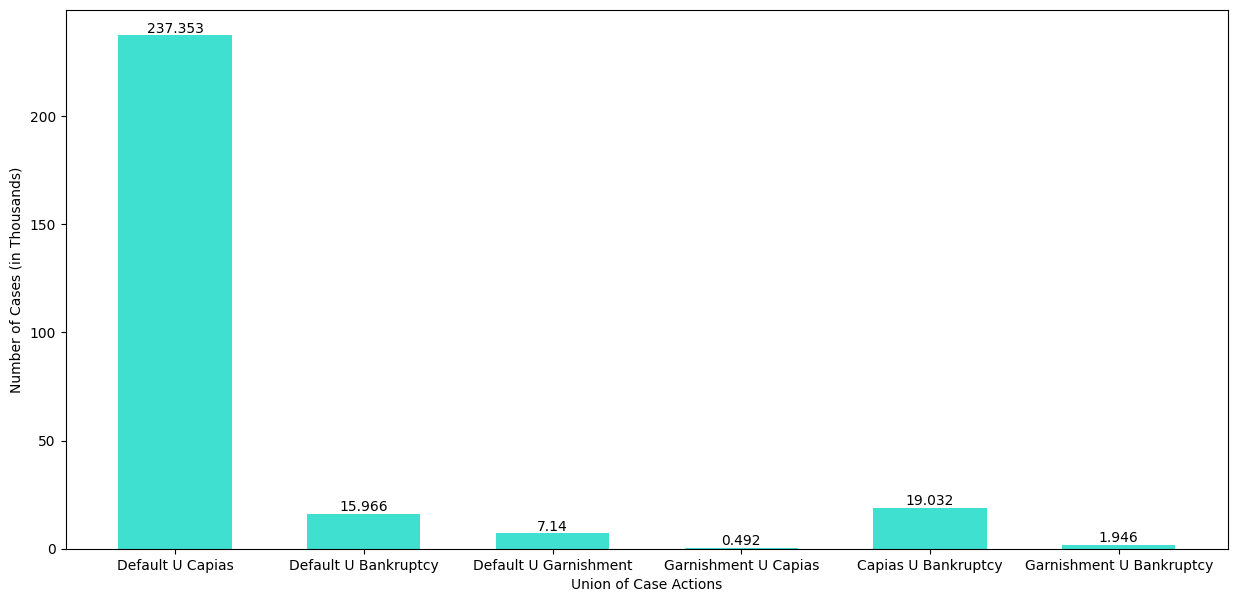

In [27]:
import numpy as np
import matplotlib.pyplot as plt

courses = ['Default U Capias', 'Default U Bankruptcy', 'Default U Garnishment', 'Garnishment U Capias', 'Capias U Bankruptcy', 'Garnishment U Bankruptcy']
values = [237353/1000, 15966/1000, 7140/1000, 492/1000, 19032/1000, 1946/1000]

# Create the figure with a specified size first
fig = plt.figure(figsize=(15, 7))

# Creating the bar plot
plt.bar(courses, values, color='turquoise', width=0.6)

# Annotate each bar with its value
for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Union of Case Actions")
plt.ylabel("Number of Cases (in Thousands)")
# plt.title("Special Case Analysis")
plt.show()

# Save the figure after displaying it
fig.savefig('special_cases.png')

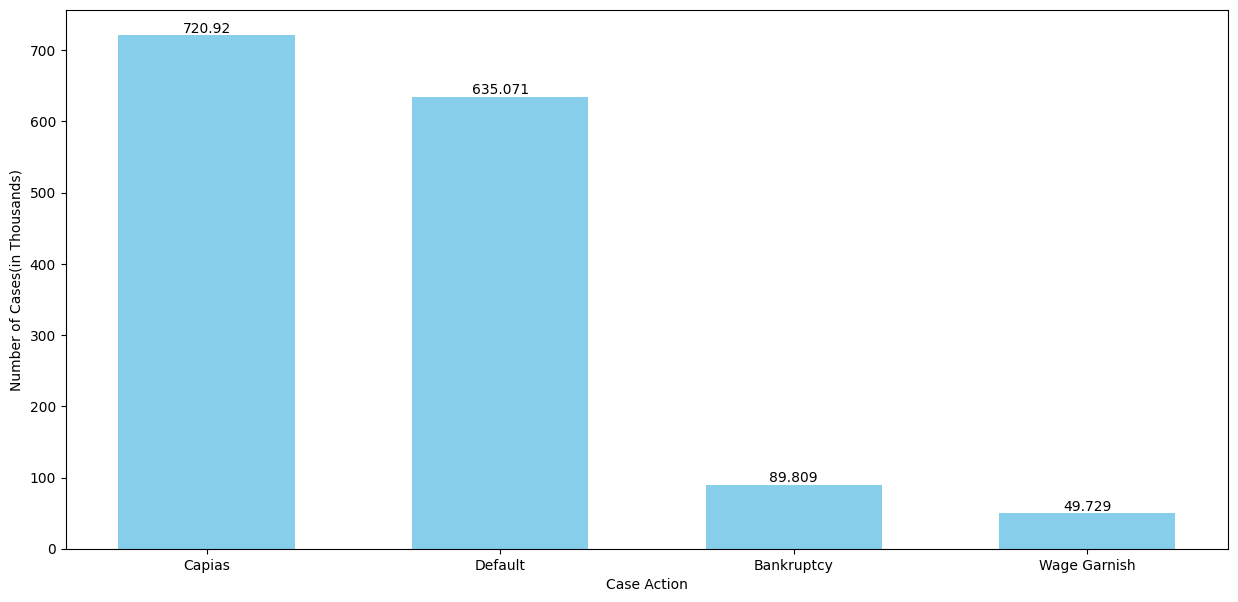

In [28]:
import numpy as np
import matplotlib.pyplot as plt

categories = ['Capias', 'Default', 'Bankruptcy', 'Wage Garnish']
values = [720920/1000, 635071/1000, 89809/1000, 49729/1000]

# Create the figure with a specified size first
fig = plt.figure(figsize=(15, 7))

# Creating the bar plot
plt.bar(categories, values, color='skyblue', width=0.6)

# Annotate each bar with its value
for index, value in enumerate(values):
    plt.text(index, value, str(value), ha='center', va='bottom')

plt.xlabel("Case Action")
plt.ylabel("Number of Cases(in Thousands)")
plt.show()

# Save the figure after displaying it
fig.savefig('special_cases.png')